# Goal 

In this notebook I basically followed the approach of     
[YLTsai [機器學習專案] Kaggle競賽-鐵達尼號生存預測(Top 3%)](https://medium.com/@yulongtsai/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f)
for the Kaggle [Titanic competition](https://www.kaggle.com/c/titanic/overview)

I tried to follow his ideas and write my own code and further explore my intuition on different choice of features. 

The author's focus is on the features selection. Otherwise he always use Random Forest with 
n_estimators = 250, min_samples_split = 20, oob_score = True. So this notebook is divided by features. 

# Data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sb

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
all_data = train.append(test)

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Helper functions

In [8]:
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw = True)
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# Features selection

## Pclass and Sex

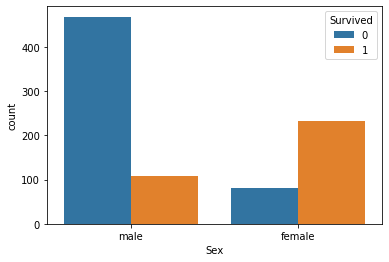

In [9]:
sb.countplot(train['Sex'], hue = train['Survived']);

In [10]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().round(3)

,Sex,Survived
0,female,0.742
1,male,0.189


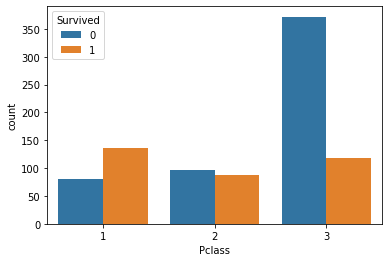

In [11]:
sb.countplot(train['Pclass'], hue = train['Survived']);

In [12]:
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index = False).mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [13]:
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index = False).sum()

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


In [14]:
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index = False).count()

,Pclass,Sex,Survived
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


**** Predict Females in PClass 1 and 2 as all survived***?
Already true in GBoosting

In [15]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
all_data['Sex_code'] = encoder.fit_transform(all_data['Sex'])

## Fare

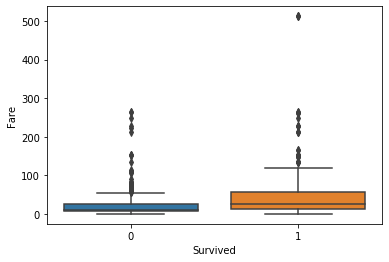

In [16]:
sb.boxplot(data = train, x = 'Survived', y = 'Fare');

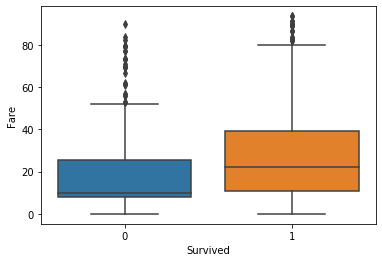

In [17]:
sb.boxplot(data = train[train.Fare < 100], x = 'Survived', y = 'Fare');

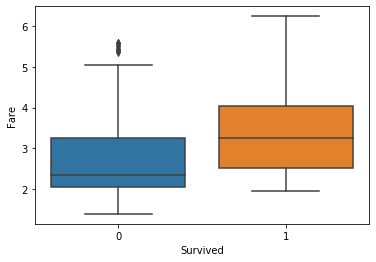

In [18]:
sb.boxplot(data = train, x = 'Survived', y = np.log(train.Fare));

In [19]:
train['log_Fare'] = np.log(train.Fare +1)

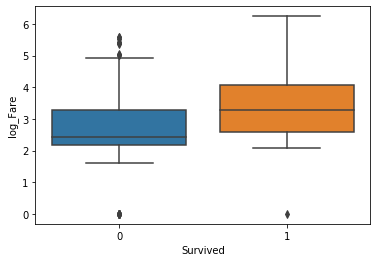

In [20]:
sb.boxplot(data = train, x = 'Survived', y = 'log_Fare');

In [21]:
pd.pivot_table(train, values = ['Fare'], index = ['Pclass'], columns = ['Survived'], aggfunc = 'median').round(3)

Fare        
Survived      0       1
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

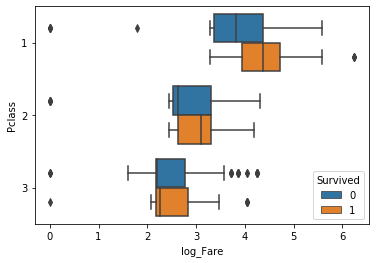

In [22]:
sb.boxplot(data = train, y = 'Pclass', x = 'log_Fare', hue ='Survived',  orient = 'h');

In [23]:
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

In [24]:
## 把 Fare 切成 3,4,5,6 塊看看

In [25]:
all_data['Fare_4'] = pd.qcut(all_data.Fare, 4)
all_data['Fare_5'] = pd.qcut(all_data.Fare, 5)
all_data['Fare_6'] = pd.qcut(all_data.Fare, 6)

In [26]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Fare_4,Fare_5,Fare_6
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.896]","(-0.001, 7.854]","(-0.001, 7.775]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(31.275, 512.329]","(41.579, 512.329]","(26.0, 53.1]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]"


In [27]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
all_data['Fare_bin_4'] = encoder.fit_transform(all_data['Fare_4'])
all_data['Fare_bin_5'] = encoder.fit_transform(all_data['Fare_5'])
all_data['Fare_bin_6'] = encoder.fit_transform(all_data['Fare_6'])

In [28]:
all_data_4 = pd.crosstab(all_data['Fare_bin_4'], all_data['Pclass'])
all_data_5 = pd.crosstab(all_data['Fare_bin_5'], all_data['Pclass'])
all_data_6 = pd.crosstab(all_data['Fare_bin_6'], all_data['Pclass'])
display_side_by_side(all_data_4, all_data_5, all_data_6)

Pclass,1,2,3
Fare_bin_4,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46
Pclass,1,2,3
Fare_bin_5,,,
0,8,6,261
1,0,36,218
2,0,124,132


In [29]:
len(train)

891

In [30]:
train = all_data[:len(train)]
test = all_data[len(train):]

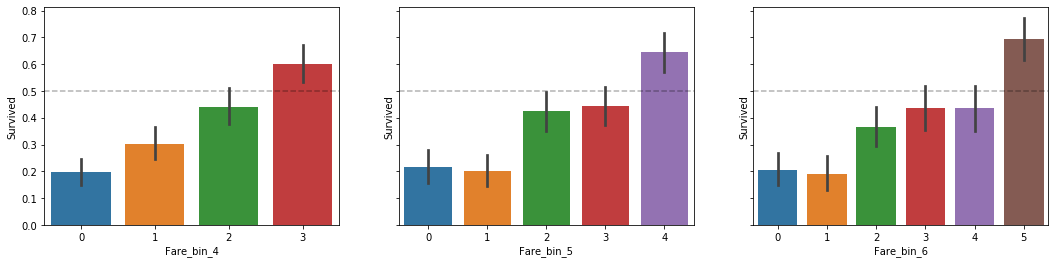

In [31]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, sharey = True)
fig.set_figwidth(18)
for axi in  [ax1, ax2, ax3]:
    axi.axhline(0.5, linestyle = 'dashed', c = 'black', alpha = .3)
g1 = sb.barplot(data = train, x = 'Fare_bin_4', y = 'Survived', ax = ax1)    
g2 = sb.barplot(data = train, x = 'Fare_bin_5', y = 'Survived', ax = ax2) 
g3 = sb.barplot(data = train, x = 'Fare_bin_6', y = 'Survived', ax = ax3)  

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Fare_4,Fare_5,Fare_6,Fare_bin_4,Fare_bin_5,Fare_bin_6
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.896]","(-0.001, 7.854]","(-0.001, 7.775]",0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(31.275, 512.329]","(41.579, 512.329]","(26.0, 53.1]",3,4,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1


In [33]:
features = ['Pclass', 'Sex_code']

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
y_train = train['Survived']

In [35]:
rfe = RandomForestClassifier(n_estimators = 5, max_depth = 11)
cv = cross_validate(rfe, train[features + ['Fare_bin_4']], train['Survived'])
cv['test_score'].mean()

0.7811311279894546

In [36]:
cv = cross_validate(rfe, train[features + ['Fare_bin_5']], y_train)
cv['test_score'].mean()

0.7968614650681063

In [37]:
cv = cross_validate(rfe, train[features + ['Fare_bin_6']], y_train)
cv['test_score'].mean()

0.7789404306069928

In [38]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
cv = cross_validate(rfe, train[features + ['Fare_bin_4']], y_train)
cv['test_score'].mean()

0.7923608059757705

In [39]:
cv = cross_validate(rfe, train[features + ['Fare_bin_5']], y_train)
cv['test_score'].mean()

0.8069738246186681

In [40]:
cv = cross_validate(rfe, train[features + ['Fare_bin_6']], y_train)
cv['test_score'].mean()

0.7722051346431487

In [41]:
rfe = RandomForestClassifier(n_estimators = 100, max_depth = 2)
cv = cross_validate(rfe, train[features + ['Fare_bin_4']], y_train)
cv['test_score'].mean()

0.7721988575732849

In [42]:
cv = cross_validate(rfe, train[features + ['Fare_bin_5']], y_train)
cv['test_score'].mean()

0.7744460485845208

In [43]:
cv = cross_validate(rfe, train[features + ['Fare_bin_6']], y_train)
cv['test_score'].mean()

0.7632791412968427

In [44]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
rfe.fit(train[features + ['Fare_bin_5']], y_train)
predictions = rfe.predict(test[features + ['Fare_bin_5']])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_base.csv', index=False)

Kaggle score: 0.78229

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [46]:
param_distributions = {'n_estimators': randint(2, 200), 'min_samples_split' : randint(15, 25), 
                       'max_depth': randint(1, 12)}

In [47]:
search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            n_iter=100,
                            param_distributions=param_distributions)
                            #random_state=0)
search.fit(train[features + ['Fare_bin_5']], y_train);

In [48]:
print(search.best_params_, search.best_score_)

{'max_depth': 5, 'min_samples_split': 23, 'n_estimators': 150} 0.810344611135522


In [49]:
rfe = RandomForestClassifier(n_estimators = 57, max_depth = 4, min_samples_split = 18)
rfe.fit(train[features + ['Fare_bin_5']], y_train)
predictions4 = rfe.predict(test[features + ['Fare_bin_5']])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_base1.csv', index=False)

Kaggle score: 0.78229

Below is the parameters exactly on the article....in the article it gets 0.79425. 

In [50]:
rfe = RandomForestClassifier(random_state = 2, n_estimators = 250, min_samples_split = 20)
rfe.fit(train[features + ['Fare_bin_5']], y_train)
predictions5 = rfe.predict(test[features + ['Fare_bin_5']])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_base2.csv', index=False)

Kaggle score: 0.78229

In [51]:
rfe = RandomForestClassifier(random_state = 2, n_estimators = 250, min_samples_split = 20)
rfe.fit(train[features + ['Fare_bin_6']], y_train)
predictions6 = rfe.predict(test[features + ['Fare_bin_6']])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_base3.csv', index=False)

Kaggle score: 0.77751

In [52]:
all_data  = all_data.drop(columns = ['Fare_4', 'Fare_5', 'Fare_6','Fare_bin_4','Fare_bin_6'])

## Family size

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Fare_4,Fare_5,Fare_6,Fare_bin_4,Fare_bin_5,Fare_bin_6
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.896]","(-0.001, 7.854]","(-0.001, 7.775]",0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(31.275, 512.329]","(41.579, 512.329]","(26.0, 53.1]",3,4,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1


In [54]:
train['Family_size'] = train['SibSp'] + train['Parch']

Now we look at the the survival rate by family size

In [55]:
survival_rate_by_family_size = train.groupby('Family_size')['Survived'].mean()
survival_rate_by_family_size 

Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

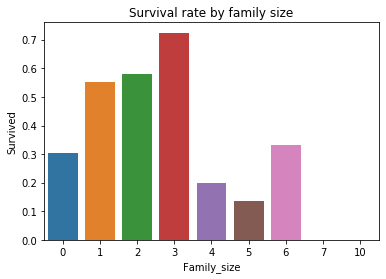

In [56]:
sb.barplot(y = survival_rate_by_family_size, x = survival_rate_by_family_size.index);
plt.title('Survival rate by family size');

Now we look at the the average survival rate by ticket count (the number passenges who have the same ticket number)

In [57]:
## add family
all_data['Family_size'] =all_data['SibSp'] + all_data['Parch']

## Ticket count

In [58]:
## add a new column to count the number of apperance of the same ticket number
train['Ticket_count'] = train.groupby('Ticket')['Ticket'].transform('count')

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_code,Fare_4,Fare_5,Fare_6,Fare_bin_4,Fare_bin_5,Fare_bin_6,Family_size,Ticket_count
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,"(-0.001, 7.896]","(-0.001, 7.854]","(-0.001, 7.775]",0,0,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,"(31.275, 512.329]","(41.579, 512.329]","(26.0, 53.1]",3,4,4,1,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]",1,1,1,0,1


In [60]:
## Look at those whose have shared ticket numbers
train[train['Ticket_count'] > 1].sort_values(['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_code,Fare_4,Fare_5,Fare_6,Fare_bin_4,Fare_bin_5,Fare_bin_6,Family_size,Ticket_count
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,...,S,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,0,3
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,...,S,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,0,3
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,...,S,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,0,3
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,...,S,1,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,2,3
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,...,S,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,...,S,0,"(31.275, 512.329]","(21.558, 41.579]","(26.0, 53.1]",3,3,4,4,4
86,87,0.0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,...,S,1,"(31.275, 512.329]","(21.558, 41.579]","(26.0, 53.1]",3,3,4,4,4
147,148,0.0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,...,S,0,"(31.275, 512.329]","(21.558, 41.579]","(26.0, 53.1]",3,3,4,4,4
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,...,S,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]",3,4,5,2,2


In [61]:
survival_rate_by_ticket_count = train.groupby('Ticket_count')['Survived'].mean()
survival_rate_by_ticket_count

Ticket_count
1    0.297989
2    0.574468
3    0.698413
4    0.500000
5    0.000000
6    0.000000
7    0.238095
Name: Survived, dtype: float64

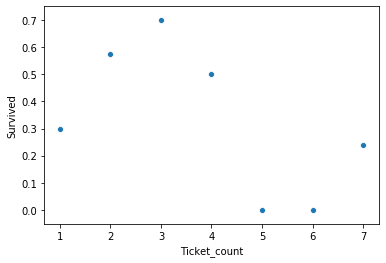

In [62]:
sb.scatterplot(y = survival_rate_by_ticket_count, x = survival_rate_by_ticket_count.index);

To add more details, we compute the average survival rate for each ticket number

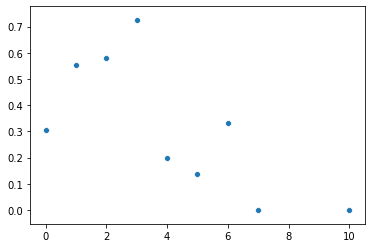

In [63]:
sb.scatterplot(data = survival_rate_by_family_size);

In [64]:
survival_rate_by_ticket_count = train.groupby('Ticket')['Ticket_count', 'Survived'].agg({'Survived': np.mean})
survival_rate_by_ticket_count.columns = ['Ticket_count', 'Survival_rate']

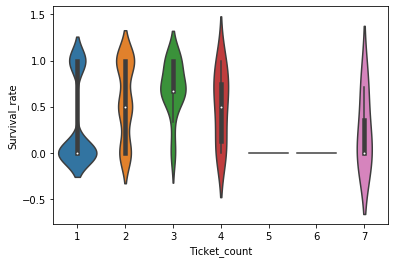

In [65]:
sb.violinplot(data = survival_rate_by_ticket_count, x = 'Ticket_count', y = 'Survival_rate');

In [66]:
## Since data is discrete, we can make a table of number of tickets for each pair (survival rate, ticket_count)
## add a dummy column with all 1's to let the size function 
pd.pivot_table(data = survival_rate_by_ticket_count, columns = ['Survival_rate'], 
               index = ['Ticket_count'], aggfunc = {'Survival_rate':np.size})

Survival_rate                                               \
Survival_rate      0.000000 0.250000 0.333333 0.500000 0.666667 0.714286   
Ticket_count                                                               
1                     384.0      NaN      NaN      NaN      NaN      NaN   
2                      25.0      NaN      NaN     30.0      NaN      NaN   
3                       2.0      NaN      1.0      NaN     11.0      NaN   
4                       3.0      1.0      NaN      2.0      NaN      NaN   
5                       2.0      NaN      NaN      NaN      NaN      NaN   
6                       3.0      NaN      NaN      NaN      NaN      NaN   
7                       2.0      NaN      NaN      NaN      NaN      1.0   

                                 
Survival_rate 0.750000 1.000000  
Ticket_count                     
1                  NaN    163.0  
2                  NaN     39.0  
3                  NaN      7.0  
4                  3.0      2.0  
5                  NaN      NaN  
6                  NaN      NaN  
7                  NaN      NaN

In [67]:
## It seems ticket count is an okay indicator...not sure

In [68]:
pd.pivot_table(survival_rate_by_ticket_count,  index = ['Survival_rate'], columns = ['Ticket_count'], aggfunc = 'count')

Survival_rate
0.000000
0.250000
0.333333
0.500000
0.666667
0.714286
0.750000
1.000000


In [69]:
survival_rate_by_ticket_count

,Ticket_count,Survival_rate
Ticket,,
110152,3,1.000000
110413,3,0.666667
110465,2,0.000000
110564,1,1.000000
110813,1,1.000000
...,...,...
W./C. 6608,4,0.000000
W./C. 6609,1,0.000000
W.E.P. 5734,1,0.000000


In [70]:
all_data['Ticket_count'] = all_data.groupby('Ticket')['Ticket'].transform('count')

## Connected Survival v1

In [71]:
all_data['Connected_Survival'] = 0.5
for _, grp in all_data.groupby('Ticket'):
    if (len(grp) > 6):
        print(grp[['PassengerId', 'Name', 'Ticket', 'Survived']])

     PassengerId             Name Ticket  Survived
74            75    Bing, Mr. Lee   1601       1.0
169          170    Ling, Mr. Lee   1601       0.0
509          510   Lang, Mr. Fang   1601       1.0
643          644  Foo, Mr. Choong   1601       1.0
692          693     Lam, Mr. Ali   1601       1.0
826          827     Lam, Mr. Len   1601       0.0
838          839  Chip, Mr. Chang   1601       1.0
39           931    Hee, Mr. Ling   1601       NaN
     PassengerId                                          Name   Ticket  \
50            51                    Panula, Master. Juha Niilo  3101295   
164          165                  Panula, Master. Eino Viljami  3101295   
266          267                     Panula, Mr. Ernesti Arvid  3101295   
638          639        Panula, Mrs. Juha (Maria Emilia Ojala)  3101295   
686          687                      Panula, Mr. Jaako Arnold  3101295   
824          825                  Panula, Master. Urho Abraham  3101295   
367         1259

In [72]:
all_data['Connected_Survival'] = all_data[all_data.Ticket == '347077']['Survived'].mean()

In [73]:
all_data['Connected_Survival'] = all_data.groupby('Ticket')['Survived'].transform('mean')
all_data['Connected_Survival'] = all_data['Connected_Survival'].fillna(0.5)

In [74]:
all_data[all_data.Ticket_count > 5][['Survived', 'Ticket', 'Ticket_count', 'Survived', 'Connected_Survival']].sort_values('Ticket')

,Survived,Ticket,Ticket_count,Survived,Connected_Survival
305,1.0,113781,6,1.0,0.5
708,1.0,113781,6,1.0,0.5
498,0.0,113781,6,0.0,0.5
306,NaN,113781,6,NaN,0.5
141,NaN,113781,6,NaN,0.5
...,...,...,...,...,...
120,0.0,S.O.C. 14879,7,0.0,0.0
665,0.0,S.O.C. 14879,7,0.0,0.0
72,0.0,S.O.C. 14879,7,0.0,0.0
212,NaN,S.O.C. 14879,7,NaN,0.0


In [75]:
features = ['Pclass', 'Sex_code', 'Fare_bin_5', 'Family_size', 'Connected_Survival']
y_train = train['Survived']
train = all_data[:len(train)]
test = all_data[len(train):]

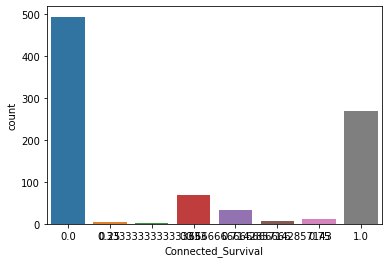

In [76]:
sb.countplot(train['Connected_Survival']);

In [77]:
rfe = RandomForestClassifier(n_estimators = 5, max_depth = 11)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.9753122842257234

In [78]:
def view_scores_2d(index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            rfe = RandomForestClassifier(n_estimators = a, max_depth = m)
            cv = cross_validate(rfe, X, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);

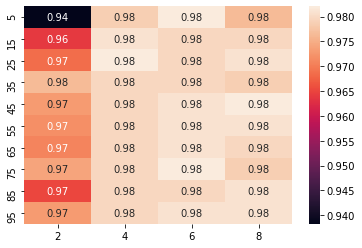

In [79]:
view_scores_2d(range(5, 100, 10), range(2, 10, 2), train[features])

In [80]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival.csv', index=False)

In [81]:
features

['Pclass', 'Sex_code', 'Fare_bin_5', 'Family_size', 'Connected_Survival']

In [82]:
rfe.feature_importances_

array([0.03972115, 0.13385603, 0.0350213 , 0.03217275, 0.75922877])

Kaggle score: 0.74401

In [83]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.9797941121084677

In [84]:
rfe.fit(train[features], y_train)
rfe.oob_score_

0.9775533108866442

In [85]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival1_1.csv', index=False)

In [86]:
features

['Pclass', 'Sex_code', 'Fare_bin_5', 'Family_size', 'Connected_Survival']

In [87]:
rfe.feature_importances_

array([0.03940984, 0.17068823, 0.0202277 , 0.01948113, 0.7501931 ])

Kaggle score: 0.74162

## Connected_survival 2
Next we'll defined Connected_Survival to be 1 if anyone in the same ticket group survives, 0 if no one survives, 0.5 if no survival data in the group. 

In [88]:
all_data['Connected_Survival'] = all_data.groupby('Ticket')['Survived'].transform('max')
all_data['Connected_Survival'] = all_data['Connected_Survival'].fillna(0.5)
train = all_data[:len(train)]
test = all_data[len(train):]

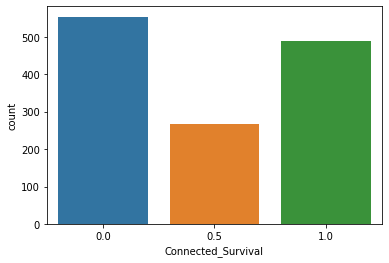

In [89]:
sb.countplot(all_data['Connected_Survival']);

In [90]:
features = ['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival']

In [91]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.9382650178896492

In [92]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival2.csv', index=False)

In [93]:
print(features)
rfe.feature_importances_

['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival']


array([0.0446388 , 0.20714371, 0.05304955, 0.69516794])

kaggle score: 0.72727

In [94]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.9371414223840311

In [95]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival2_2.csv', index=False)

In [96]:
print(features)
rfe.feature_importances_

['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival']


array([0.04283722, 0.15737838, 0.03934191, 0.76044249])

Kaggle score: 0.73205

## Connected_Survival v3
Define Connected_Survival to be the survival rate of people (exclude self) in the same ticket group (exclude NaN). 0.5 if no other have the same ticket number or the survival rate is not defined. 

In [97]:
other_survivals = all_data.groupby('Ticket')['Survived'].transform('sum') - all_data['Survived'].fillna(0)
other_survivals_count = all_data.groupby('Ticket')['Survived'].transform('count') - (all_data['Survived'].notna())

In [98]:
all_data['Connected_Survival'] = other_survivals/other_survivals_count
all_data['Connected_Survival'] = all_data['Connected_Survival'].fillna(0.5)
no_other = (all_data.groupby('Ticket')['Survived'].transform('count') == 1) & (~all_data['Survived'].isna())
all_data.Connected_Survival[no_other]= 0.5

In [99]:
train = all_data[:len(train)]
test = all_data[len(train):]

In [100]:
all_data.groupby('Ticket')['Survived'].transform('count') == 1

0       True
1       True
2       True
3      False
4       True
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Survived, Length: 1309, dtype: bool

In [101]:
all_data[all_data.Ticket_count > 5][['Ticket', 'Ticket_count', 'Survived', 'Connected_Survival']].sort_values('Ticket')

,Ticket,Ticket_count,Survived,Connected_Survival
305,113781,6,1.0,0.333333
708,113781,6,1.0,0.333333
498,113781,6,0.0,0.666667
306,113781,6,NaN,0.500000
141,113781,6,NaN,0.500000
...,...,...,...,...
120,S.O.C. 14879,7,0.0,0.000000
665,S.O.C. 14879,7,0.0,0.000000
72,S.O.C. 14879,7,0.0,0.000000
212,S.O.C. 14879,7,NaN,0.000000


In [102]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.8193208210407381

In [103]:
rfe = RandomForestClassifier(n_estimators = 25, max_depth = 8)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival3.csv', index=False)

In [104]:
print(features)
rfe.feature_importances_

['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival']


array([0.16738556, 0.5053232 , 0.10873359, 0.21855765])

Kaggle score: 0.78947

In [105]:
def view_scores_2d(index, column, X):
    data = []
    for a in index:
        scores = []
        for m in column:
            rfe = RandomForestClassifier(n_estimators = a, max_depth = m)
            cv = cross_validate(rfe, X, y_train)
            scores.append(cv['test_score'].mean())
        data.append(scores)
    df = pd.DataFrame(data, columns = column , index = index)    
    sb.heatmap(df, annot=True);

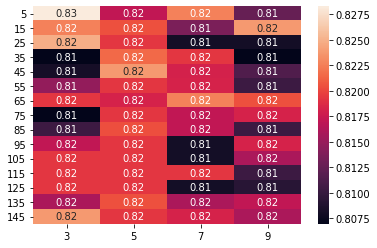

In [106]:
index = range(5, 150, 10)
column = range(3, 11, 2)
view_scores_2d(index, column, train[features])

In [107]:
rfe = RandomForestClassifier(n_estimators = 5, max_depth = 5)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival3_1.csv', index=False)

Kaggle score: 0.78468

In [108]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.8080911430544221

In [109]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival3_2.csv', index=False)

In [110]:
print(features)
rfe.feature_importances_

['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival']


array([0.16262515, 0.5271121 , 0.10115519, 0.20910756])

Kaggle score: 0.79425

## Connected_Survival v4 
Here the connected_survival rate is the same as tutorial. It's 
- 1 if anyone (exclude self) in the same ticket group survives
- 0 if no one (exclude self) in the same ticket group survives
- 0.5 if we don't know any survival information of other people in the same ticket group. 

In [111]:
other_survived = (all_data.groupby('Ticket')['Survived'].transform('sum')- all_data['Survived'].fillna(0)) 
all_data['Connected_Survival'] = (other_survived > 0).astype(int)
## Now the whole column is all defined and the value is 0 or 1
## we want to pick the case where all other are actually unknown

In [112]:
## if the total number of known cases in the group is one and self is the one
no_other = (all_data.groupby('Ticket')['Survived'].transform('count') == 1) & \
            (all_data['Survived'].notna())
all_data.Connected_Survival[no_other] = 0.5  

In [113]:
## if the whole group doesn't have any known cases
no_other = (all_data.groupby('Ticket')['Survived'].transform('count') == 0) 
all_data.Connected_Survival[no_other] = 0.5  

In [114]:
train = all_data[:len(train)]
test = all_data[len(train):]

In [115]:
all_data[all_data.Ticket_count == 3][['Ticket', 'Ticket_count', 'Survived', 'Connected_Survival']].sort_values('Ticket').head()

,Ticket,Ticket_count,Survived,Connected_Survival
504,110152,3,1.0,1.0
759,110152,3,1.0,1.0
257,110152,3,1.0,1.0
585,110413,3,1.0,1.0
558,110413,3,1.0,1.0


In [116]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.8148389931579938

In [117]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_conn_survival4.csv', index=False)

Kaggle score: 0.79665

## Age ＝ [Minor]

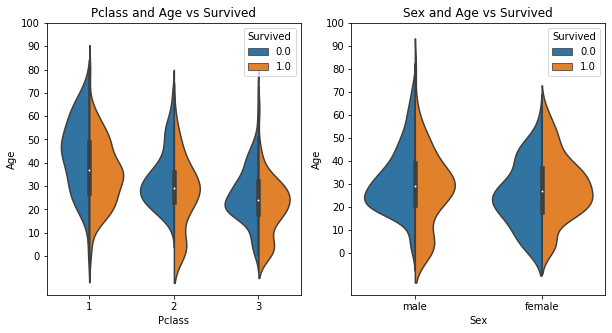

In [118]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sb.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0]);
ax[0].set_title('Pclass and Age vs Survived');
ax[0].set_yticks(range(0, 110, 10));

sb.violinplot("Sex", "Age", hue="Survived", data=train, split=True, ax=ax[1]);
ax[1].set_title('Sex and Age vs Survived');
ax[1].set_yticks(range(0, 110, 10));

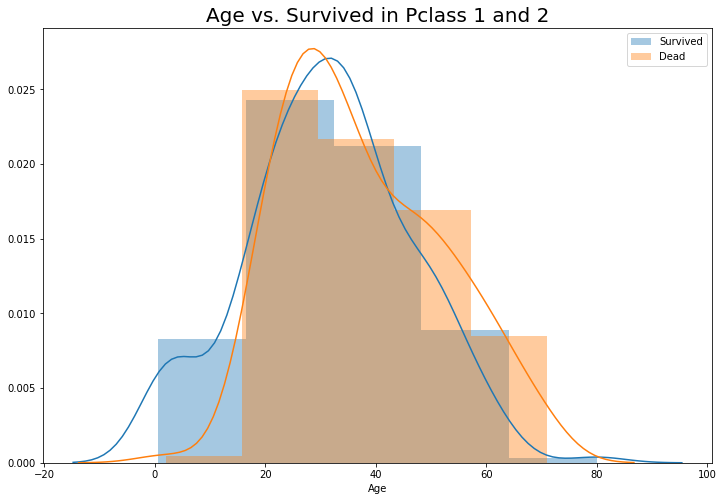

In [119]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sb.distplot(train.loc[(train.Pclass != 3) &(train.Survived == 1), 'Age'], bins = 5, label = 'Survived');
ax = sb.distplot(train.loc[ (train.Pclass != 3) &(train.Survived == 0), 'Age'], bins = 5, label = 'Dead');
ax.legend();
ax.set_title('Age vs. Survived in Pclass 1 and 2', fontsize = 20);

It looks like 

In [120]:
all_data[all_data.Age.isnull()].head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Fare_bin_5,Family_size,Ticket_count,Connected_Survival
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,0,1,0.5
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,2,0,1,0.5
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,0,0,1,0.5
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,0,0,1,0.5
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,1,0,1,0.5
29,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1,1,0,1,0.5
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,4,1,3,1.0
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,0,0,1,0.5
36,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,0,0,1,0.5
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1,1,0,1,0.5


In [121]:
all_data['Title'] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms', 'Mme'], "Miss")
all_data['Title']  = all_data['Title'].replace(['Lady'], "Mrs")
all_data.Title[~all_data.Title.isin(['Mrs', 'Miss', 'Mr', 'Master'])]  = 'Rare'

In [122]:
title_age = all_data.groupby('Title')['Age'].median()
title_age

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       36.0
Rare      47.0
Name: Age, dtype: float64

In [123]:
for title in ['Mrs', 'Miss', 'Mr', 'Master', 'Rare']:
    all_data.loc[(all_data.Title == title) & (all_data.Age.isnull()), 'Age'] = title_age[title]
    ## why I can't use all_data[(all_data.Title == 'Miss') & (all_data.Age == -1)]['Age'] to assign?

In [124]:
all_data['Minor'] = (all_data['Age'] < 16)*1
all_data[all_data['Age'] < 16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Fare_bin_5,Family_size,Ticket_count,Connected_Survival,Title,Minor
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2,4,5,0.0,Master,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,3,1,2,0.0,Mrs,1
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,2,2,3,1.0,Miss,1
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,0,0,0,1,0.5,Miss,1
16,17,0.0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,1,3,5,6,0.0,Master,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1271,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S,1,3,6,7,1.0,Master,1
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S,1,2,4,5,0.0,Master,1
392,1284,NaN,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,1,2,2,3,1.0,Master,1
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0,2,2,3,0.5,Miss,1


In [125]:
train = all_data[:len(train)]
test = all_data[len(train):]

In [126]:
features = features + ['Minor']
features

['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival', 'Minor']

In [127]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.8249074132195091

In [128]:
rfe.fit(train[features], y_train)
rfe.oob_score_

0.8417508417508418

In [129]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_Age.csv', index=False)

Kaggle score: 0.81100

## Age = [Minor, Elder]

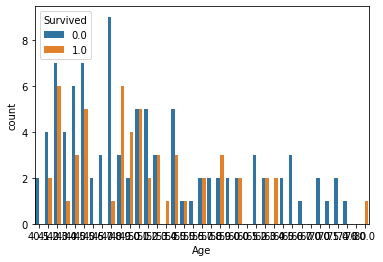

In [130]:
sb.countplot(data = all_data[all_data['Age'] > 40][['Age','Survived']], x = 'Age', hue = 'Survived')

In [131]:
all_data['Elder'] = (all_data['Age'] > 40)*1
train = all_data[:len(train)]
test = all_data[len(train):]
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Fare_bin_5,Family_size,Ticket_count,Connected_Survival,Title,Minor,Elder
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,1,0.5,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,4,1,2,0.5,Mrs,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1,0.5,Miss,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,4,1,2,0.0,Mrs,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,1,0.5,Mr,0,0


In [132]:
features = ['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival', 'Minor', 'Elder',]

In [133]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
cv = cross_validate(rfe, train[features], y_train)
cv['test_score'].mean()

0.8327537505492437

In [134]:
rfe.fit(train[features], y_train)
rfe.oob_score_

0.8372615039281706

In [135]:
rfe = RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True)
rfe.fit(train[features], y_train)
predictions = rfe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions.astype(int)})
output.to_csv('Random_Forest_Age2.csv', index=False)

Kaggle score: 0.79425

# Conclusion

The best score submitted to Kaggle is 0.811, which uses the same features, random forest with same hyperparameters as the original article. So the different versions of connected_survival feature didn't help. Interesting the author got 0.82296. 

The best score is from 
RandomForestClassifier(n_estimators = 250, min_samples_split = 20, oob_score = True) on  ['Pclass', 'Sex_code', 'Fare_bin_5', 'Connected_Survival', 'Minor']